In [1]:
# Import necessary libraries
# %pip install matplotlib plotly seaborn pandas xgboost imbalanced-learn scikit-learn 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier, DMatrix, train
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import os,gc, re, time, math, tqdm, itertools
import plotly.express as px
import plotly.offline as pyo

label_encoder = LabelEncoder()


In [ ]:
# df = pd.read_csv('/kaggle/working/combined.csv')
df = pd.read_csv('/kaggle/working/combined.csv', on_bad_lines='skip', low_memory=False)

# cic_ids2018_path = kagglehub.dataset_download('rionaldotio/cic-ids2018')
df.head()
df.info()
maindf = df.copy()
# df.shape
# print(data)

In [ ]:
use_dfs = dfs.copy()

In [ ]:
# See all data in all csv
csv_files = [file for file in os.listdir(dataset_path) if (file.endswith(".csv"))  ]

for file in csv_files:
    df_name = os.path.splitext(file)[0]
    single_df = dfs[df_name]
    single_df[single_df['Label'] != "Label"]
    print(single_df['Label'].unique())
    print(single_df['Label'].value_counts())
    sns.set(rc={'figure.figsize':(12, 6)})
    plt.xlabel('Attack Type')
    sns.set_theme()
    ax = sns.countplot(x='Label', data=single_df)
    ax.set(xlabel='Attack Type DF '+df_name, ylabel='Number of Attacks')
    plt.show()


In [ ]:
# Combine all dataset to 1 csv
dataset_path = "/kaggle/input/ids-intrusion-csv"
output_path = "/kaggle/working/combined4.csv"  # this is where the combined data will go

csv_files = [file for file in os.listdir(dataset_path) if file.endswith(".csv")]

first_file = True  # we'll use this to write the header only once

for file in csv_files:
    file_path = os.path.join(dataset_path, file)
    df_name = os.path.splitext(file)[0]
    print(f"Processing: {file}")
    chunk_df = pd.read_csv(file_path, low_memory=False)
    if(df_name != "02-20-2018"):
        # print(df_name)
        chunk_df = chunk_df[chunk_df['Label'] != "Label"]
        chunk_df = chunk_df[chunk_df['Label'] != "Benign"]
    else:     
        excluded_columns = ['Flow ID', 'Src IP','Src Port', 'Dst IP']
        chunk_df = chunk_df.drop(columns=excluded_columns)
        
    chunk_df.to_csv(output_path, mode='a', index=False, header=first_file)
    first_file = False  # after the first file, don't write header again

    del chunk_df  # free up memory
    gc.collect()
    

print("All files have been combined and saved to disk at:", output_path)


In [2]:
# read combined csv
gc.collect()
df = pd.read_csv("/kaggle/working/combined4.csv",on_bad_lines='skip', low_memory=False)
print("done")

done


['Infilteration' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'DDOS attack-LOIC-UDP'
 'DDOS attack-HOIC' 'Bot' 'Brute Force -Web' 'Brute Force -XSS'
 'SQL Injection' 'Benign' 'DDoS attacks-LOIC-HTTP' 'FTP-BruteForce'
 'SSH-Bruteforce']
Label
Benign                      7372557
DDOS attack-HOIC             686012
DDoS attacks-LOIC-HTTP       576191
DoS attacks-Hulk             461912
Bot                          286191
FTP-BruteForce               193360
SSH-Bruteforce               187589
Infilteration                161934
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Brute Force -Web                611
Brute Force -XSS                230
SQL Injection                    87
Name: count, dtype: int64


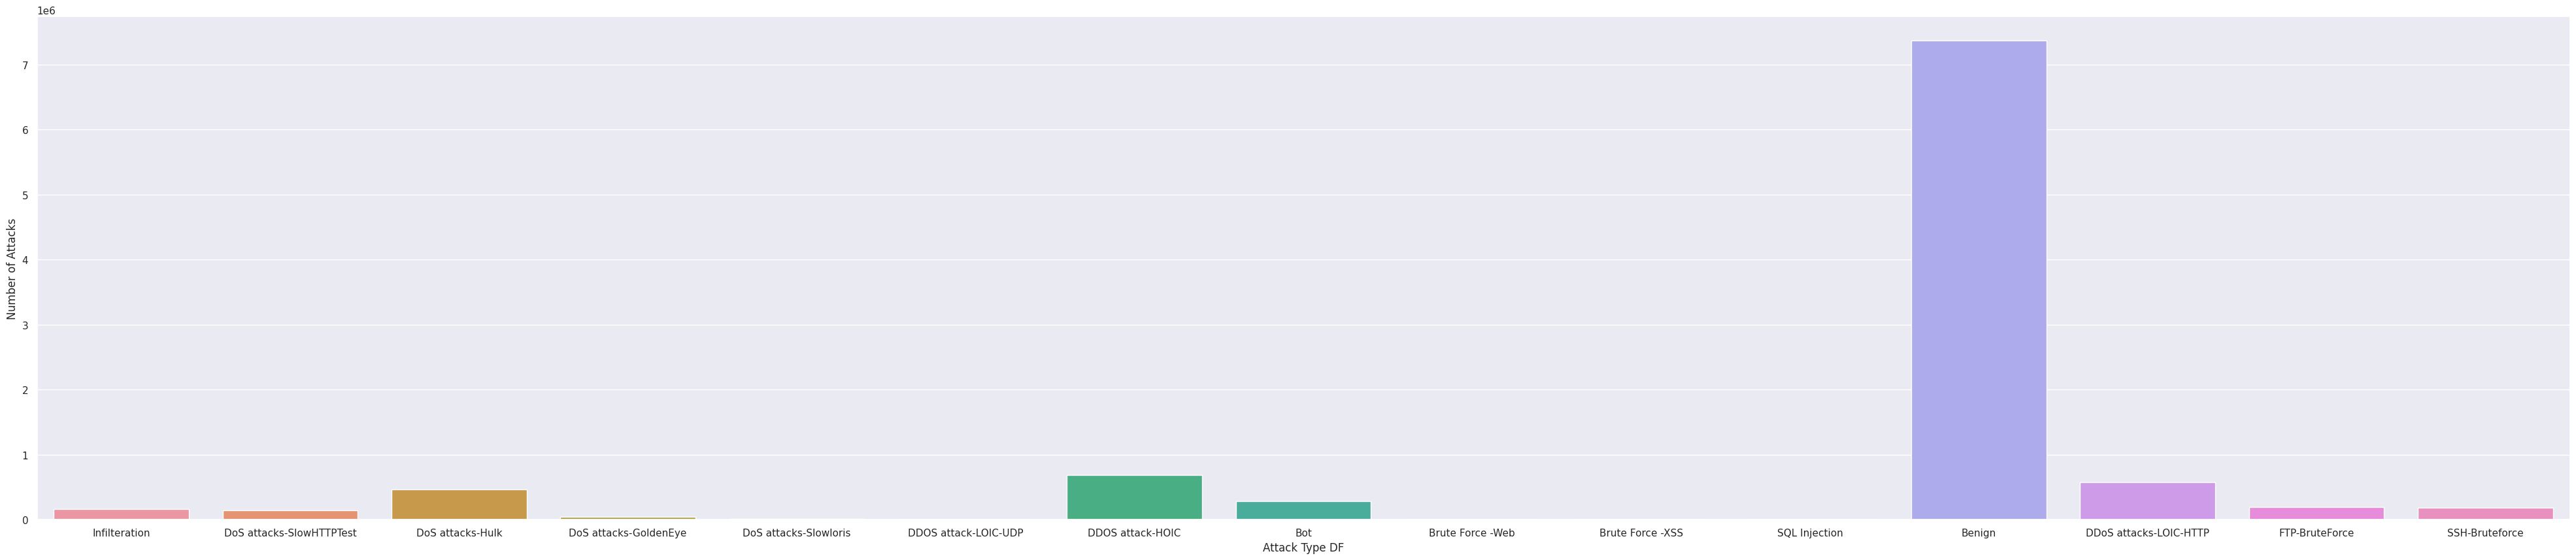

In [3]:
print(df['Label'].unique())
print(df['Label'].value_counts())

sns.set(rc={'figure.figsize':(50, 10)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=df)
ax.set(xlabel='Attack Type DF', ylabel='Number of Attacks')
plt.show()

In [5]:
# dataset cleaning
def fixDataType(df_dataset):

    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']

    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)

    return df_dataset
    
def dropInfinateNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

def dropUnnecessaryColumn(df):
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

def transformTargetLabelToBinary(df):
    label_map = {
        'DDOS attack-HOIC': 'DDoS',
        'DDoS attacks-LOIC-HTTP': 'DDoS',
        'DDOS attack-LOIC-UDP': 'DDoS',
    
        'DoS attacks-Hulk': 'DoS',
        'DoS attacks-SlowHTTPTest': 'DoS',
        'DoS attacks-GoldenEye': 'DoS',
        'DoS attacks-Slowloris': 'DoS',
    
        'FTP-BruteForce': 'Brute Force',
        'SSH-Bruteforce': 'Brute Force',
        'Brute Force -Web': 'Brute Force',
        'Brute Force -XSS': 'Brute Force',
    
        'SQL Injection': 'Web Attack',
    }
    df['Label'] = df['Label'].replace(label_map)
    return df




In [6]:
# useDf = df.copy()
df = fixDataType(df)

In [7]:
df = dropInfinateNull(df)
df = dropUnnecessaryColumn(df)

(10120792, 80)
(10060038, 80)
(10060038, 79)


In [8]:

df = transformTargetLabelToBinary(df)

In [9]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
# # Optional: get mapping
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print(label_mapping)

In [ ]:
df

In [ ]:
#shorting data set
df1 = df[df["Label"] == "Benign"][:10000]
df2 = df[df["Label"] == "Malicious"][:10000]

sdf = pd.concat([ df1,df2], axis =0)
sdf["Label"].value_counts()

In [1]:
#split data
X=df.drop(["Label"], axis=1)
y=df["Label"]

NameError: name 'df' is not defined

In [10]:
df_sampled = df.sample(frac=0.5, random_state=42)
y = df.pop('Label')  # y is now the Label column
X = df   

In [14]:
X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,6,198,3,0,77,0,46,0,25.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,443,6,223,3,0,77,0,46,0,25.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,443,6,587,3,0,77,0,46,0,25.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
4,443,6,763,3,0,77,0,46,0,25.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
5,443,6,852,3,0,77,0,46,0,25.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120787,80,6,46,2,0,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
10120788,80,6,277,2,1,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
10120789,80,6,331,2,1,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
10120790,80,6,313,2,1,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
# del df
gc.collect()

In [ ]:
#split data for XGB Param tuning
X_tune=sdf.drop(["Label"], axis=1)
y_tune=sdf["Label"]

In [ ]:
ros = RandomOverSampler()

X_balanced, y_balanced = ros.fit_resample(X, y)

X_balanced.shape, y_balanced.shape

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb_model
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = xgb_model.XGBClassifier(eval_metric='logloss')
scores = cross_val_score(model, X_train, y_train_encoded, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


In [ ]:
# XGBoost without tune
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_balanced)
# Update the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_encoded, test_size=0.3, random_state=42)

# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Decode the predictions back to the original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

In [ ]:
# ===============================================
# 1. Install and Import Necessary Libraries
# ===============================================
# Install CuPy
# Replace 'cupy-cuda112' with your CUDA version (e.g., cupy-cuda111 for CUDA 11.1)
# !pip install cupy-cuda112

# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

from sklearn.metrics import (
    classification_report, accuracy_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    precision_recall_curve, roc_curve
)
from xgboost import XGBClassifier, plot_importance, DMatrix, train

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

import joblib
import warnings

import shap
import cupy as cp

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Configure matplotlib for inline display (if using Jupyter Notebook)
%matplotlib inline

# Set pandas display options and matplotlib parameters
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)


# ===============================================
# 4. Split into Training and Testing Sets
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# 5. Normalize the Data
# ===============================================
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print("\nData normalization using MinMaxScaler completed.")

# ===============================================
# 6. Handle Class Imbalance with SMOTE
# ===============================================
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE Oversampling:")
print(f"X_train_balanced Shape: {X_train_balanced.shape}")
print("y_train_balanced Distribution:")
print(pd.Series(y_train_balanced).value_counts())

# ===============================================
# 7. Convert Data to CuPy Arrays
# ===============================================
# Convert NumPy arrays to CuPy arrays for GPU processing
X_train_cp = cp.asarray(X_train_balanced)
X_test_cp = cp.asarray(X_test_scaled)

print("\nData converted to CuPy arrays for GPU processing.")

# ===============================================
# 8. Define Parameter Grid for Hyperparameter Tuning
# ===============================================
param_grid = {
    'n_estimators': [100, 200],           # Reduced options
    'max_depth': [4, 6],                  # Reduced options
    'learning_rate': [0.01, 0.05],        # Reduced options
    'subsample': [0.8, 0.9],              # Reduced options
    'colsample_bytree': [0.8, 0.9],       # Reduced options
    'min_child_weight': [3, 5],           # Reduced options
    'reg_lambda': [3, 5],                 # Reduced options
    'reg_alpha': [0.1, 1],                 # Reduced options
    'gamma': [0.1, 0.2]                    # Reduced options
}

print("\nParameter Grid for Hyperparameter Tuning:")
print(param_grid)

# ===============================================
# 9. Initialize the XGBoost Model with GPU Support
# ===============================================
base_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',              # Updated from 'gpu_hist' to 'hist'
    device='cuda',                   # Enables GPU acceleration
    random_state=42
)

# Set early_stopping_rounds via set_params
base_model.set_params(early_stopping_rounds=20)

print("\nBase XGBoost Model Initialized with GPU Support and Early Stopping.")

# ===============================================
# 10. Set Up Cross-Validation Strategy
# ===============================================
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\nStratifiedKFold Cross-Validation Strategy Defined.")

# ===============================================
# 11. Set Up RandomizedSearchCV for Hyperparameter Tuning
# ===============================================
# Note: RandomizedSearchCV may not fully leverage CuPy's GPU capabilities and could trigger device mismatch warnings.
# To fully utilize GPU, consider using XGBoost's native API for hyperparameter tuning.
# However, for simplicity, we'll proceed with RandomizedSearchCV here.

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=100,                          # Number of parameter settings sampled
    scoring='f1',                        # F1-score is suitable for imbalanced datasets
    cv=cv_strategy,
    verbose=2,
    random_state=42,
    n_jobs=-1                            # Utilize all available cores
)

print("\nRandomizedSearchCV Configured.")

# ===============================================
# 12. Fit RandomizedSearchCV
# ===============================================
print("\nStarting RandomizedSearchCV for Hyperparameter Tuning...")
random_search.fit(
    X_train_cp[:10000], 
    y_train_balanced[:10000],
    eval_set=[(X_test_cp[:10000], y_test[:10000])],
    verbose=True
)
print("\nRandomizedSearchCV Completed.")

# ===============================================
# 13. Retrieve Best Parameters and Best Estimator
# ===============================================
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("\nBest Parameters Found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print("\nBest Estimator:")
print(best_estimator)

# ===============================================
# 14. Train the Final Model with Best Parameters
# ===============================================
# Initialize final model with best parameters and GPU support
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',              # Updated from 'gpu_hist' to 'hist'
    device='cuda',                   # Enables GPU acceleration
    random_state=42,
    **best_params
)

# Set early_stopping_rounds via set_params
final_model.set_params(early_stopping_rounds=20)

print("\nFinal XGBoost Model Initialized with Best Parameters and GPU Support.")

# Train the final model using CuPy arrays
print("\nTraining the Final Model on GPU...")
final_model.fit(
    X_train_cp, 
    y_train_balanced,
    eval_set=[(X_test_cp, y_test)],
    verbose=True
)
print("\nFinal Model Training Completed.")




In [ ]:
# ===============================================
# 15. Predictions and Evaluation
# ===============================================
# Make predictions on the test set using CuPy arrays
y_pred = final_model.predict(X_test_cp)
y_proba = final_model.predict_proba(X_test_cp)[:,1]

# Convert predictions back to NumPy arrays for evaluation
y_pred_np = cp.asnumpy(y_pred)
y_proba_np = cp.asnumpy(y_proba)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_np)
f1 = f1_score(y_test, y_pred_np)
roc_auc = roc_auc_score(y_test, y_proba_np)

print(f"\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_np, target_names=label_encoder.classes_))


# ===============================================
# 19. Feature Importance
# ===============================================
plt.figure(figsize=(10,8))
plot_importance(final_model, max_num_features=20, importance_type='gain')
plt.title('Feature Importance')
plt.show()

# ===============================================
# 20. Model Interpretability with SHAP
# ===============================================
# Convert CuPy array back to NumPy for SHAP
X_test_np = cp.asnumpy(X_test_cp)

# Initialize SHAP Explainer
shap_explainer = shap.Explainer(final_model)
shap_values = shap_explainer(X_test_np)

# Summary Plot
shap.summary_plot(shap_values, X_test_np, feature_names=X.columns)

# ===============================================
# 21. Save the Trained Model
# ===============================================
model_filename = 'best_xgb_model_gpu.pkl'
joblib.dump(final_model, model_filename)
print(f"\nModel saved as {model_filename}")

In [ ]:
# ===============================================
# Make predictions on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print(X)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Reshape data for CNN and LSTM
# For CNN: Add a channel dimension
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# For LSTM: Reshape to 3D (samples, timesteps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

y_nn = label_encoder.fit_transform(y_balanced)
y_nn = to_categorical(y_nn)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# Encode target labels for neural networks


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_nn, test_size=0.3, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_nn.shape[1], activation='softmax')
])

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Accuracy:", cnn_accuracy)


In [ ]:
from tensorflow.keras.layers import LSTM

# Split the data for LSTM
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_nn, test_size=0.3, random_state=42)

# Define WD-LSTM model
wd_lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(y_nn.shape[1], activation='softmax')
])

# Compile model
wd_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(label_encoder.transform(y_balanced)), y=label_encoder.transform(y_balanced))
class_weights = dict(enumerate(class_weights))

wd_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate model
lstm_loss, lstm_accuracy = wd_lstm_model.evaluate(X_test, y_test)
print("WD-LSTM Accuracy:", lstm_accuracy)

In [ ]:
# Save XGBoost model

joblib.dump(final_model, 'xgboost_tuned_model.pkl')

# Save CNN model
cnn_model.save('cnn_model.h5')

# Save WD-LSTM model
wd_lstm_model.save('wd_lstm_model.h5')


In [ ]:
# Load XGBoost model
xgb = joblib.load('/kaggle/input/xgb-untuned/tensorflow2/default/1/xgboost_model_untuned.pkl') #untuned
# xgb = joblib.load('/kaggle/input/xgb/tensorflow2/default/1/best_xgb_model_gpu.pkl') #main
# xgb = joblib.load('/kaggle/working/updated_xgb_model_gpu.pkl')

# Load CNN model
from tensorflow.keras.models import load_model
cnn_model = load_model('/kaggle/input/cnn/keras/default/1/cnn_model (2).h5')
wd_lstm_model = load_model('/kaggle/input/wdlstm/keras/default/1/wd_lstm_model (2).h5')


In [ ]:
import gc
import cupy as cp

# Clear CuPy cache
cp._default_memory_pool.free_all_blocks()
gc.collect()

print("GPU memory cleared.")


In [ ]:
df = pd.read_csv('/kaggle/input/ids-intrusion-csv/02-16-2018.csv')
print("Dataset IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018) : 02-16-2018.csv")
# Preprocess the data
df = fixDataType(df)
df = dropInfinateNull(df)
df = dropUnnecessaryColumn(df)
df = transformTargetLabelToBinary(df)

# Split data into features (X) and target (y)
X = df.drop(["Label"], axis=1)
y = df["Label"]

# Handle class imbalance with RandomOverSampler
ros = RandomOverSampler()
X_balanced, y_balanced = ros.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from xgboost import train, DMatrix
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)

print("\nAfter SMOTE Oversampling:")
print(f"X_train_balanced Shape: {X_train_balanced.shape}")
print("y_train_balanced Distribution:")
print(pd.Series(y_train_balanced).value_counts())

# Split training data into training and validation sets
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.2, random_state=42
)

# Create DMatrix for training, validation, and testing
dtrain_part = DMatrix(X_train_part, label=y_train_part, nthread=-1)
dval = DMatrix(X_val, label=y_val, nthread=-1)
dtest = DMatrix(X_test_scaled, label=y_test_encoded, nthread=-1)

# Extract parameters from the loaded model
params = xgb.get_params()
params['tree_method'] = 'hist'  # Use GPU-based histogram method
params['predictor'] = 'cpu_predictor'  # Use GPU for prediction
params['eval_metric'] = 'logloss'  # Evaluation metric

# Define training parameters
num_boost_round = 10000  # Large number of boosting rounds
early_stopping_rounds = 20  # Stop if no improvement after 20 rounds

# Continue training the model
print("\nStarting GPU-Based Continued Training...")
continued_model = train(
    params=params,
    dtrain=dtrain_part,
    num_boost_round=num_boost_round,
    xgb_model=xgb.get_booster(),  # Load the pre-trained booster
    evals=[(dval, "validation")],
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=10
)

print("\nContinued Training Completed.")

# Save the updated model
# continued_model.save_model('/kaggle/working/updated_xgb_model_gpu.json')
print("\nUpdated XGBoost model saved as 'updated_xgb_model_gpu.json'.")


In [ ]:
joblib.dump(continued_model, 'updated_xgb_model_gpu.pkl')


In [ ]:
# ===============================================
# 4. Evaluate the Continued Model
# ===============================================
# Predictions
y_pred = continued_model.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)  # Binarize probabilities if needed

# Decode labels back to original strings
y_pred_labels = label_encoder.inverse_transform(y_pred_binary)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Print sample predictions
print("\nSample Predictions:")
print(f"Predicted Labels: {y_pred_labels[:10]}")
print(f"Actual Labels:    {y_test_labels[:10]}")

# Accuracy and F1-Score
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("F1-Score:", f1_score(y_test_labels, y_pred_labels, pos_label="Malicious"))
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_cnn is your feature set and y_nn is your labels
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_nn, test_size=0.2, random_state=42)

# Prepare data for each model (no change here)
X_test_xgb = X_test.reshape(X_test.shape[0], X_test.shape[1])  # (n_samples, n_features)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (n_samples, n_features, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  # (n_samples, 1, n_features)

# Get the model probabilities
# xgb_probs = xgb.predict(DMatrix(X_test_xgb))  # For XGBoost
xgb_probs = xgb.predict(X_test_xgb)  # For XGBoost
cnn_probs = cnn_model.predict(X_test_cnn)  # For CNN
wd_lstm_probs = wd_lstm_model.predict(X_test_lstm)  # For LSTM

# Map predictions to "Malicious" and "Benign"
# Assuming 0 = Benign and 1 = Malicious for binary classification
# For XGBoost, we needs to get the index of the highest probability (argmax)
xgb_preds = xgb_probs  # Get predicted class index (0 or 1)
cnn_preds = np.argmax(cnn_probs, axis=1)  # Get predicted class index (0 or 1)
wd_lstm_preds = np.argmax(wd_lstm_probs, axis=1)  # Get predicted class index (0 or 1)

# Map the predicted class indices to the labels
def map_to_labels(preds):
    return ["Benign" if pred == 0 else "Malicious" for pred in preds]

# Apply mapping
xgb_labels = map_to_labels(xgb_preds)
cnn_labels = map_to_labels(cnn_preds)
wd_lstm_labels = map_to_labels(wd_lstm_preds)


combined_preds = []
for i in range(len(xgb_preds)):
    votes = [xgb_labels[i], cnn_labels[i], wd_lstm_labels[i]]
    final_vote = max(set(votes), key=votes.count)
    combined_preds.append(final_vote)

y_test = np.argmax(y_test, axis=1)
y_test =  map_to_labels(y_test)

# ccheck predi
# print("XGBoost Predictions (Malicious/Benign):", xgb_labels[:10])
# print("CNN Predictions (Malicious/Benign):", cnn_labels[:10])
# print("WD-LSTM Predictions (Malicious/Benign):", wd_lstm_labels[:10])
# print("Combined Predictions (Majority Voting):", combined_preds[:10])

# Calculate accuracy for the combined predictions
accuracy = accuracy_score(y_test, combined_preds)
xgb_acc= accuracy_score(y_test, xgb_labels)
cnn_acc = accuracy_score(y_test, cnn_labels)
lstm_acc = accuracy_score(y_test, wd_lstm_labels)

print("Dataset IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018) : 02-16-2018.csv")
print("Ensemble Model Accuracy (Majority Voting): ",accuracy)
print("xgb untuned Model Accuracy (Majority Voting): ",xgb_acc)
print("cnn Model Accuracy (Majority Voting): ",cnn_acc)
print("lstm Model Accuracy (Majority Voting): ",lstm_acc)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, combined_preds))
print("F1-Score:", f1_score(y_test, combined_preds, pos_label="Malicious"))
# print("\nClassification Report:")
# print(classification_report(y_test, combined_preds))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the combined predictions
conf_matrix = confusion_matrix(y_test, combined_preds, labels=["Benign", "Malicious"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix for Ensemble Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def map_to_labels(preds):
    return ["Benign" if pred == 0 else "Malicious" for pred in preds]

# Assuming X_cnn is your feature set and y_nn is your labels
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_nn, test_size=0.2, random_state=42)

# Prepare data for each model (no change here)
X_test_xgb = X_test.reshape(X_test.shape[0], X_test.shape[1])  # (n_samples, n_features)

xgb_probs = xgb.predict_proba(X_test_xgb)  # For XGBoost

print(map_to_labels(np.argmax(xgb_probs, axis=1)))
print(y_test)

In [ ]:
print(f"X_test_xgb shape: {X_test_xgb.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"X_test_lstm shape: {X_test_lstm.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print(f"xgb_preds shape: {xgb_preds.shape}")


In [ ]:
print("XGBoost Predictions (Malicious/Benign):", xgb_labels[:10])
print("CNN Predictions (Malicious/Benign):", cnn_labels[:10])
print("WD-LSTM Predictions (Malicious/Benign):", wd_lstm_labels[:10])
y_test = np.argmax(y_test, axis=1)  # Get predicted class index (0 or 1)
print("ril :", map_to_labels(y_test[:10]))

In [ ]:
# Evaluate individual model accuracies
xgb_probs = xgb_probs.reshape(-1, num_classes)
cnn_probs = cnn_probs.reshape(-1, num_classes)
wd_lstm_probs = wd_lstm_probs.reshape(-1, num_classes)

xgb_preds = np.argmax(xgb_probs, axis=1)
cnn_preds = np.argmax(cnn_probs, axis=1)
wd_lstm_preds = np.argmax(wd_lstm_probs, axis=1)

xgb_acc = accuracy_score(y_test, xgb_preds)
cnn_acc = accuracy_score(y_test, cnn_preds)
wd_lstm_acc = accuracy_score(y_test, wd_lstm_preds)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"WD-LSTM Accuracy: {wd_lstm_acc:.4f}")


In [ ]:
# Get probabilities from each model


# Combine predictions (e.g., soft voting)
ensemble_probs = (xgb_probs + cnn_probs + wd_lstm_probs) / 3
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Decode predictions to original labels (using the already fitted label_encoder)
final_preds = label_encoder.inverse_transform(ensemble_preds)

# Decode y_test to its original labels for comparison
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Check for size consistency
if len(final_preds) != len(y_test_labels):
    print(f"Warning: Size mismatch! Predictions: {len(final_preds)}, True Labels: {len(y_test_labels)}")
    # Align sizes
    min_len = min(len(final_preds), len(y_test_labels))
    final_preds = final_preds[:min_len]
    y_test_labels = y_test_labels[:min_len]

# Calculate accuracy directly with original labels
accuracy = accuracy_score(y_test_labels, final_preds)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

# Classification report for additional insights
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test_labels, final_preds))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Decode final_preds if it is in one-hot-encoded format
if len(final_preds.shape) > 1 and final_preds.shape[1] > 1:  # Check if one-hot encoded
    final_preds = np.argmax(final_preds, axis=1)

# Decode true labels from one-hot format, if necessary
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if one-hot encoded
    y_test = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_preds)

print(f"Ensemble Model Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, final_preds))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each model and the ensemble
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_probs[:, 1])
auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, wd_lstm_probs[:, 1])
auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs[:, 1])
auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linestyle='--')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {auc_cnn:.2f})', linestyle='-.')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})', linestyle=':')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {auc_ensemble:.2f})', color='black')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line

# Add plot details
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
